In [1]:
# importing libraries yang dibutuhkan 
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import csv dari lokal komputer (file csv)
df = pd.read_csv('D:\Materi Data Science\Project Mini Course\Project 3\marketing_campaign_data.csv')
df.sample(10)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1602,1602,2565,1955,S2,Cerai,70638000.0,0,0,01-06-2013,69,...,3,0,1,0,0,0,0,3,11,0
495,495,3136,1962,S2,Cerai,59432000.0,0,1,13-04-2013,88,...,5,0,0,0,0,0,0,3,11,0
1112,1112,10022,1973,S3,Lajang,54466000.0,1,1,09-02-2014,78,...,5,0,0,0,0,0,0,3,11,0
26,26,2404,1976,S1,Menikah,53359000.0,1,1,27-05-2013,4,...,7,0,0,0,0,0,0,3,11,0
407,407,8890,1971,S3,Cerai,65808000.0,1,1,30-05-2014,1,...,6,0,0,0,0,0,0,3,11,0
2203,2203,2736,1978,S1,Menikah,73807000.0,0,1,02-01-2013,88,...,2,0,0,0,0,0,0,3,11,0
1617,1617,940,1987,S1,Lajang,57100000.0,1,0,18-05-2014,9,...,3,0,0,0,0,0,0,3,11,0
1974,1974,8360,1971,D3,Menikah,54690000.0,1,1,07-11-2013,76,...,3,0,0,0,0,0,0,3,11,0
1681,1681,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,84,...,5,0,0,0,0,0,0,3,11,0
164,164,8475,1973,S3,Menikah,157243000.0,0,1,01-03-2014,98,...,0,0,0,0,0,0,0,3,11,0


In [3]:
# Deteksi dan hitung kolom yang null
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- Terdapat 24 nilai null pada fitur Income, maka dari itu kita isi dengan nilai rata-rata (mean)

### Handle Missing Value

In [4]:
# Mengisi nilai mean pada fitur Income
df.fillna(df['Income'].median(), inplace=True)
df.isna().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [5]:
#Periksa duplikat data
jlh_data = df.shape[0]
duplikat = df.duplicated().sum()

# Tampilkan hasilnya
print(f'Jumlah data awal = {jlh_data} dengan total duplikasi data = {duplikat}')

Jumlah data awal = 2240 dengan total duplikasi data = 0


- Tidak terdapat data duplikat

### Handling Outlier

In [6]:
# Cek Outlier Kolom Numerik
col_numeric = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

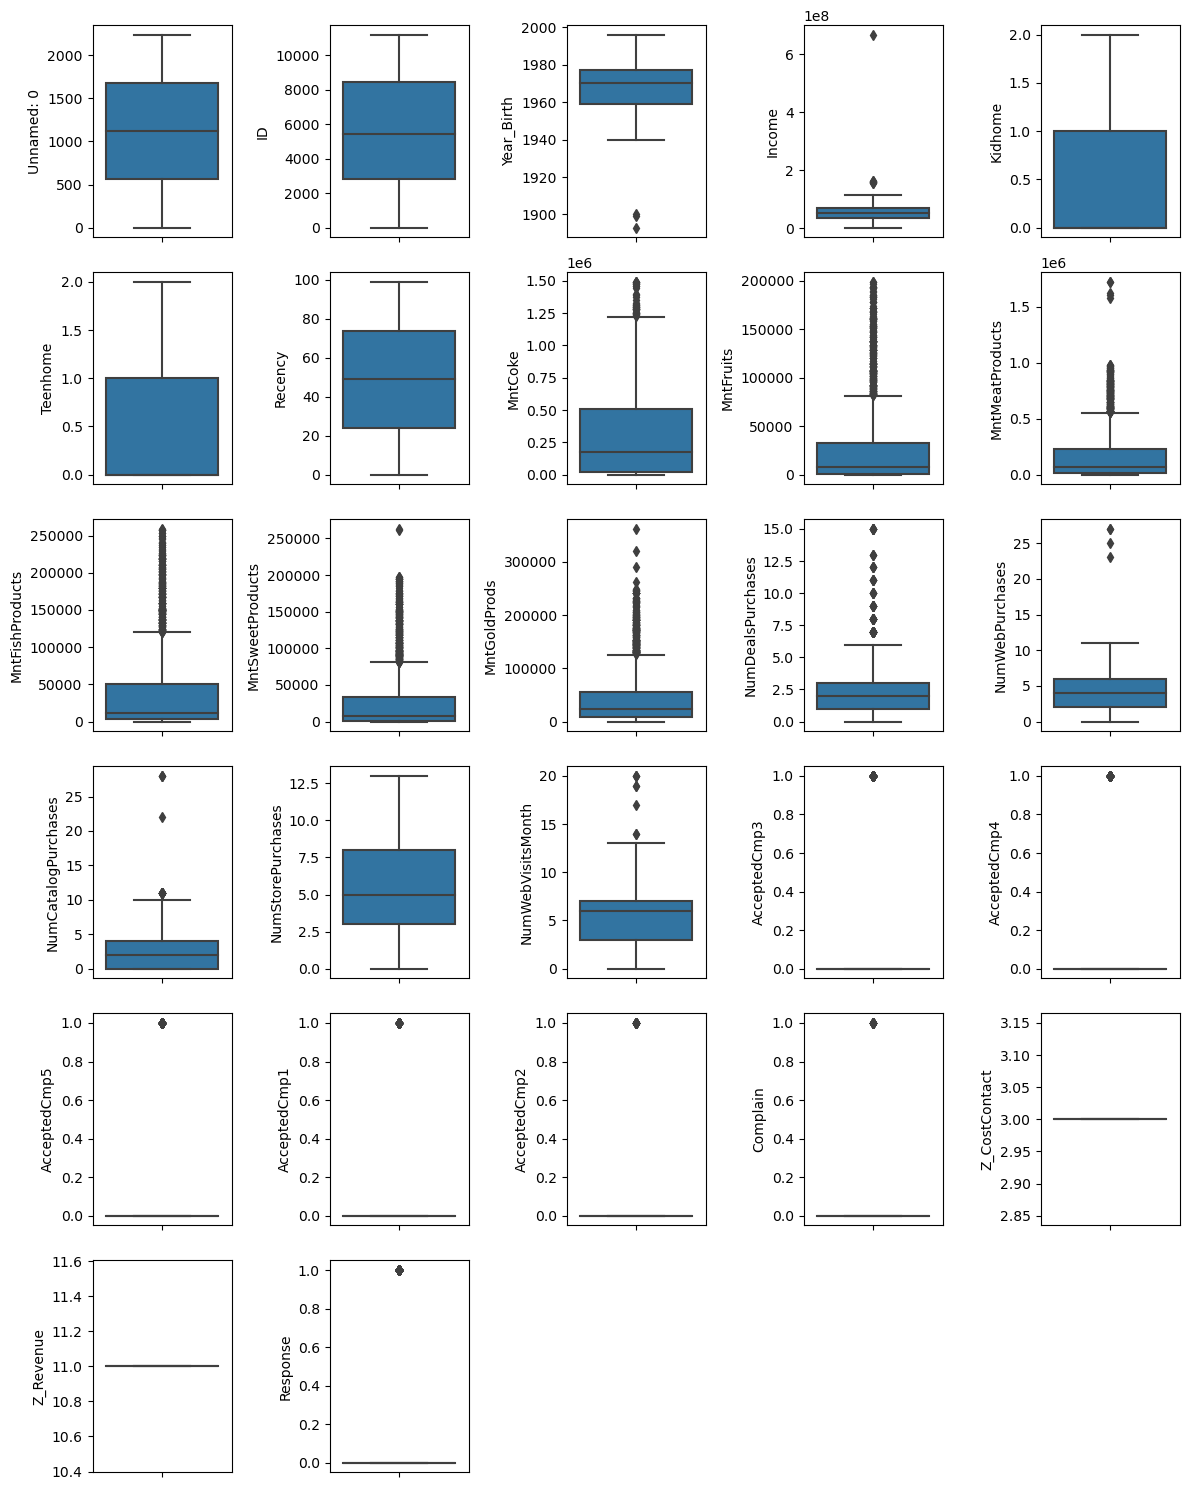

In [7]:
# cek outlier fitur numerikal
plt.figure(figsize=(12, 15))
for i in range(0, len(col_numeric)):
    plt.subplot(6, 5, i+1)
    sns.boxplot(y=df[col_numeric[i]], orient='v')
    plt.tight_layout()

In [8]:
#Handle Outlier menggunakan z.score
# List fitur yang akan di-handle outliernya
features = [
    'Year_Birth', 'Income', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds', 
    'NumDealsPurchases', 'NumCatalogPurchases','NumWebVisitsMonth'
]

In [9]:
# Filter Outlier
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in features:
    zscore = np.abs(stats.zscore(df[col]))  # Menghitung absolute Z-score
    filtered_entries = (zscore < 3) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 2240
Jumlah baris setelah memfilter outlier: 2065


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2065 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2065 non-null   int64  
 1   ID                   2065 non-null   int64  
 2   Year_Birth           2065 non-null   int64  
 3   Education            2065 non-null   object 
 4   Marital_Status       2065 non-null   object 
 5   Income               2065 non-null   float64
 6   Kidhome              2065 non-null   int64  
 7   Teenhome             2065 non-null   int64  
 8   Dt_Customer          2065 non-null   object 
 9   Recency              2065 non-null   int64  
 10  MntCoke              2065 non-null   int64  
 11  MntFruits            2065 non-null   int64  
 12  MntMeatProducts      2065 non-null   int64  
 13  MntFishProducts      2065 non-null   int64  
 14  MntSweetProducts     2065 non-null   int64  
 15  MntGoldProds         2065 non-null   int64 

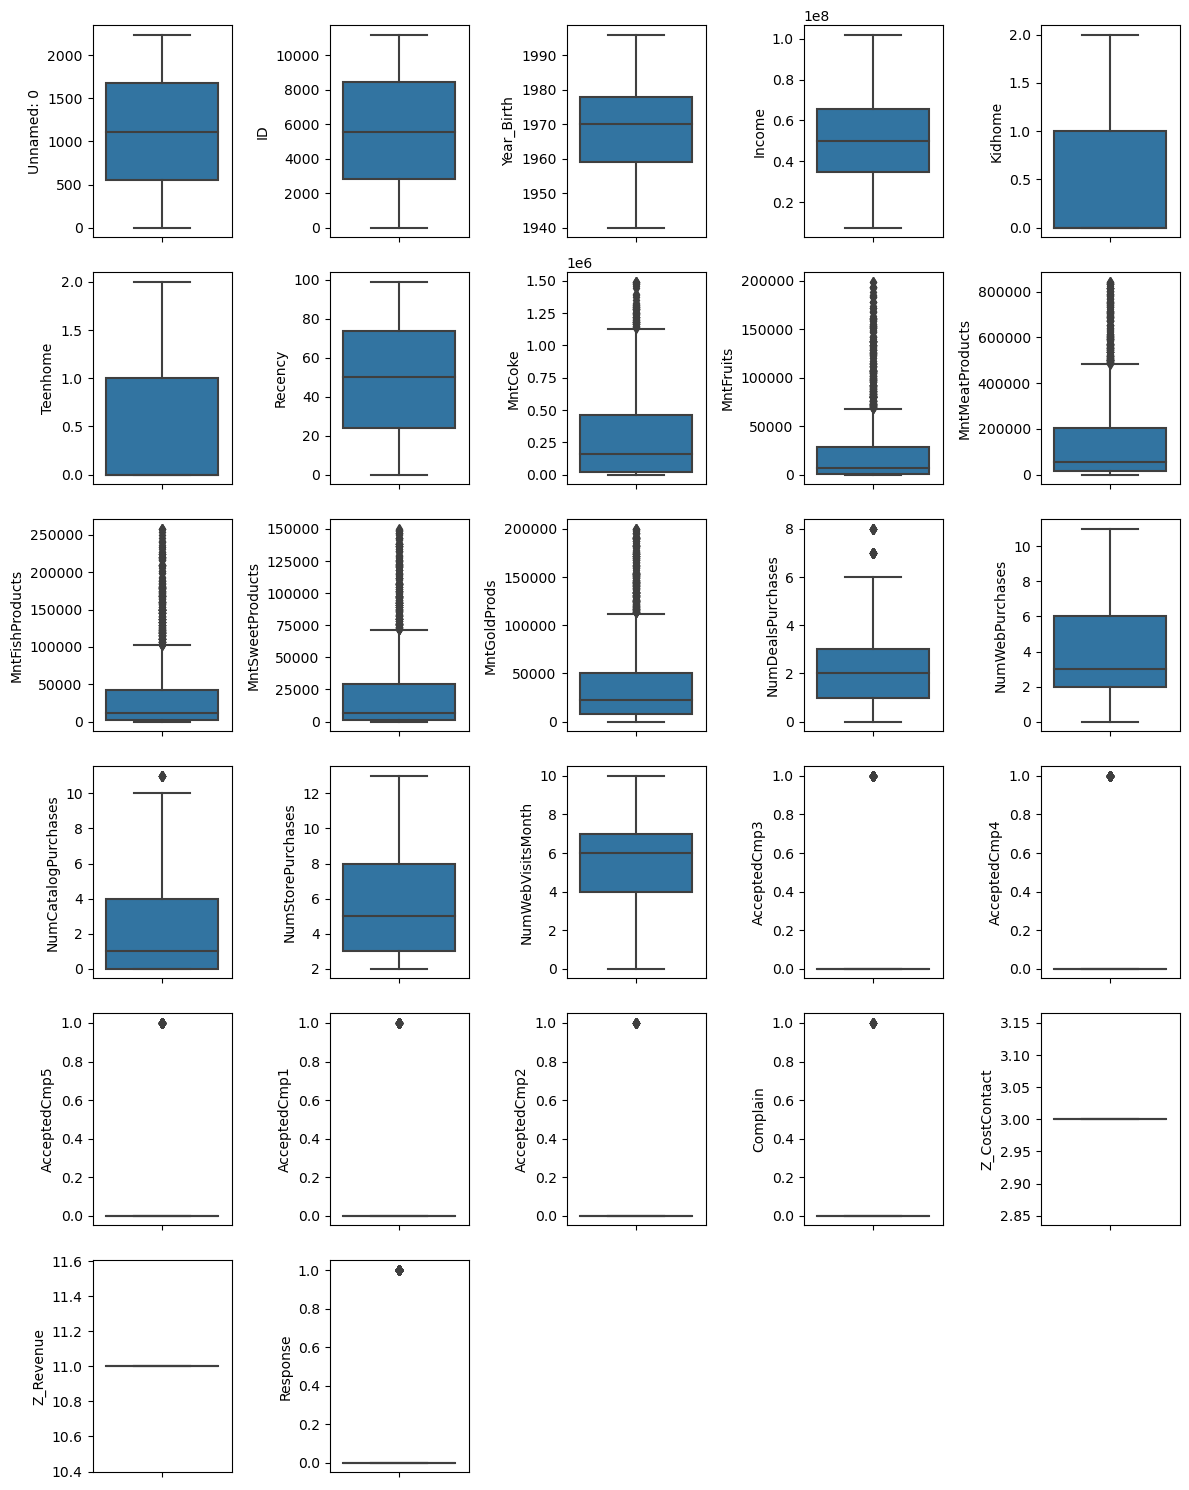

In [10]:
# cek outlier fitur numerikal setelah di filter
plt.figure(figsize=(12, 15))
for i in range(0, len(col_numeric)):
    plt.subplot(6, 5, i+1)
    sns.boxplot(y=df[col_numeric[i]], orient='v')
    plt.tight_layout()

#### Membuat Tabel Umur

In [11]:
#membuat tabel umur
df['umur'] = 2024 - df['Year_Birth']

unique_umur = sorted(df['umur'].unique())
print(unique_umur)

[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84]


### Feature Engineering

##### Fitur Membership_Duration

In [12]:
# Mengubah kolom Dt_Customer menjadi datetime dengan format DD-MM-YYYY
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [16]:
#Feature Engineering untuk Membership_Duration = tahun_sekarang - Dt_Customer
df['Membership_Duration'] = 2024 - df['Dt_Customer'].dt.year
df['Membership_Duration'].value_counts()

Membership_Duration
11    1103
10     524
12     438
Name: count, dtype: int64

##### Fitur Cat_Age

In [15]:
#Feature Engineering untuk umur (Cat_Age) = tahun_sekarang - Year_Birth
bins = [17, 35, 55, 100]
labels = ['Remaja', 'Dewasa', 'Lansia' ]

# Menggunakan pd.cut untuk mengelompokkan umur
df['Cat_Age'] = pd.cut(df['umur'], bins=bins, labels=labels, right=False)

# Menampilkan DataFrame dengan kelompok umur
df['Cat_Age'].value_counts()

Cat_Age
Dewasa    1022
Lansia     992
Remaja      51
Name: count, dtype: int64

##### Fitur Total_Children

In [17]:
#Feature Engineering untuk Total_Children = Kidhome + Teenhome
df['Total_Children'] = (df['Kidhome'] + df['Teenhome'])

#Menampilkan dataframe Total_Children
df['Total_Children'].value_counts()

Total_Children
1    1089
0     532
2     395
3      49
Name: count, dtype: int64

##### Fitur Total_Transaction

In [18]:
#Feature Engineer untuk Total_Transaction = NumDealsPurchase + NumWebPurchase + NumCatlogPuchase + NumStorePurchase
df['Total_Transaction'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
#Menampilkan
df['Total_Transaction'].value_counts()

Total_Transaction
7     149
5     145
4     127
6     122
17    106
9     102
8      94
16     93
20     87
21     85
19     85
22     82
10     80
23     78
12     69
18     66
15     65
11     65
26     60
25     57
14     54
24     46
13     43
27     35
28     27
32     10
29     10
31      9
30      8
34      4
35      1
33      1
Name: count, dtype: int64

##### Fitur Total_Spending

In [19]:
# Feature Engineering untuk Total_Spending = MntCoke + MntFruits + MntMeatProducts + MntFishProductss + MntSweetProducts + MntGoldProds
df['Total_Spending'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

#Menampilkan
df['Total_Spending'].value_counts()

Total_Spending
46000      19
22000      17
57000      16
55000      15
44000      15
           ..
761000      1
290000      1
1066000     1
764000      1
843000      1
Name: count, Length: 954, dtype: int64

##### Total_Accepted_Campaign

In [20]:
#Feature Engineer untuk Total_Accepted_Campaign = AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 
df['Total_Accepted_Campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

#Menampilkan
df['Total_Accepted_Campaign'].value_counts()

Total_Accepted_Campaign
0    1537
1     326
2     127
3      40
4      26
5       9
Name: count, dtype: int64

##### Feature Conversion Rate (CVR)

In [21]:
# Menghitung conversion rate untuk setiap entri
df['CVR'] = (df['Total_Transaction'] / df['NumWebVisitsMonth'])

# Menangani kemungkinan nilai NaN atau infinit jika ada NumWebVisitsMonth = 0
df['CVR'].replace([float('inf'), -float('inf')], 0, inplace=True)
df['CVR'].fillna(0, inplace=True)

# Melihat beberapa baris pertama dari dataset yang sudah dimodifikasi
df['CVR'].value_counts()

CVR
1.000000    121
2.000000     62
3.000000     45
0.714286     43
4.000000     43
           ... 
9.666667      1
6.750000      1
3.625000      1
4.857143      1
3.375000      1
Name: count, Length: 164, dtype: int64

In [22]:
# Pilih kolom yang relevan untuk analisis, misalnya 'Marital_Status' dan 'Education'
categories = ['Marital_Status', 'Education']

# Menghitung conversion rate untuk setiap kategori
conversion_rates = {}
for category in categories:
    conversion_rate_by_category = df.groupby(category).apply(lambda x: (x['Response'].sum() / x['NumWebVisitsMonth'].sum()) * 100)
    conversion_rates[category] = conversion_rate_by_category



In [23]:
# Sorting untuk 'Marital_Status'
marital_status_order = ['Lajang', 'Bertunangan', 'Menikah', 'Janda', 'Duda']
df['Marital_Status'] = pd.Categorical(df['Marital_Status'], categories=marital_status_order, ordered=True)

# Sorting untuk 'Education'
education_order = ['SMA', 'D3', 'S1', 'S2', 'S3']
df['Education'] = pd.Categorical(df['Education'], categories=education_order, ordered=True)

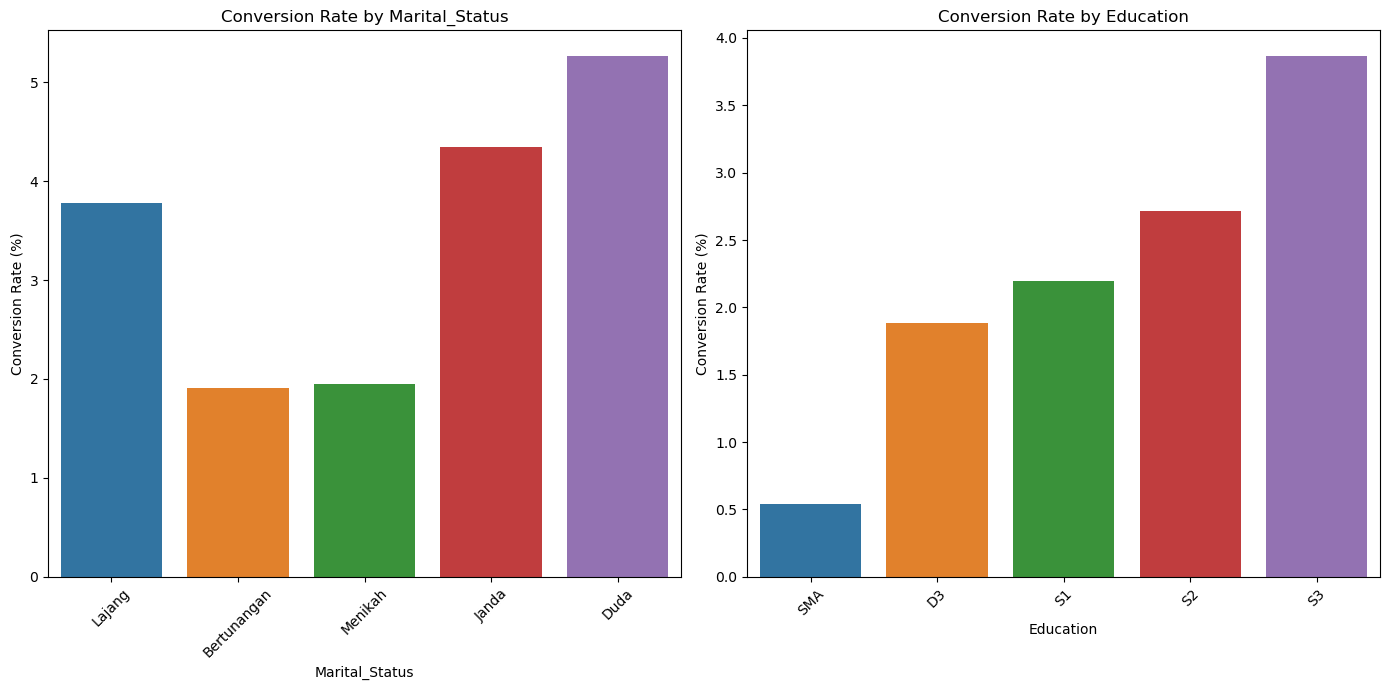

In [24]:
#Membuat Plot
plt.figure(figsize=(14, 7))
for i, (category, rates) in enumerate(conversion_rates.items(), 1):
    plt.subplot(1, 2, i)
    sns.barplot(x=rates.index, y=rates.values, order=marital_status_order if category == 'Marital_Status' else education_order)
    plt.title(f'Conversion Rate by {category}')
    plt.ylabel('Conversion Rate (%)')
    plt.xlabel(category)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

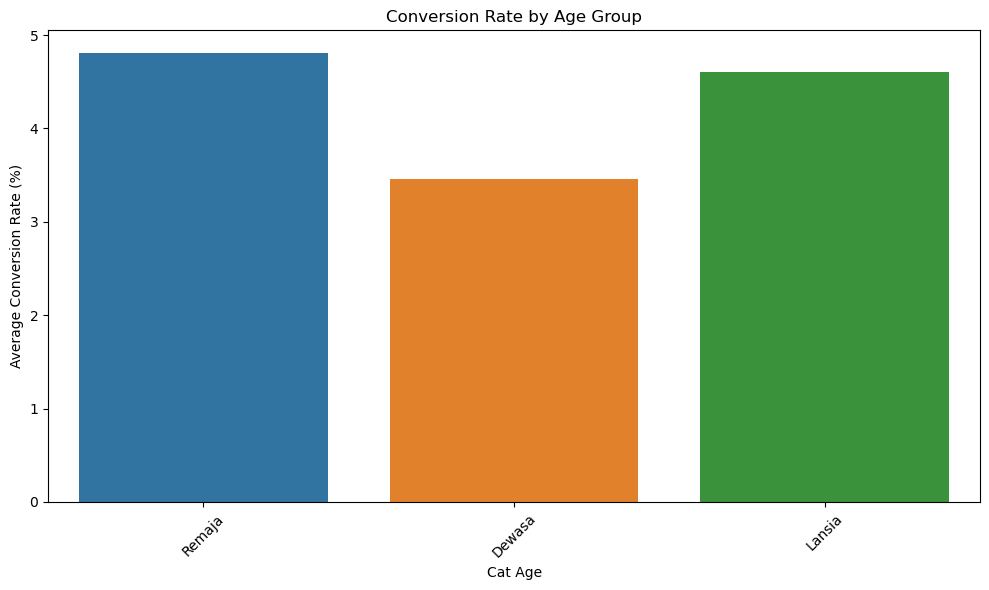

In [25]:
# Menghitung rata-rata CVR untuk setiap kelompok umur
age_group_cvr = df.groupby('Cat_Age')['CVR'].mean().reset_index()

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Cat_Age', y='CVR', data=age_group_cvr)
plt.title('Conversion Rate by Age Group')
plt.xlabel('Cat Age')
plt.ylabel('Average Conversion Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan plot
plt.show()

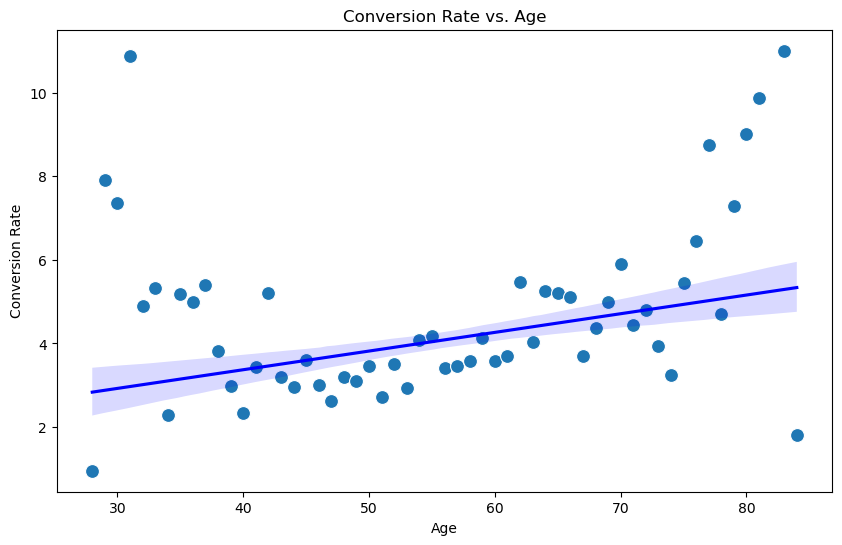

In [26]:
# Menghitung rata-rata CVR untuk setiap umur
age_group_cvr1 = df.groupby('umur')['CVR'].mean().reset_index()

#Membuat Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='umur', y='CVR', data=age_group_cvr1, s=100)
sns.regplot(x='umur', y='CVR', data=df, scatter=False, color='blue')
plt.title('Conversion Rate vs. Age')
plt.xlabel('Age')
plt.ylabel('Conversion Rate')
plt.show()

## Feature Encoding

In [27]:
num_fe = [
    'Total_Children','Total_Spending', 'Total_Transaction', 'Total_Accepted_Campaign', 'CVR'
]

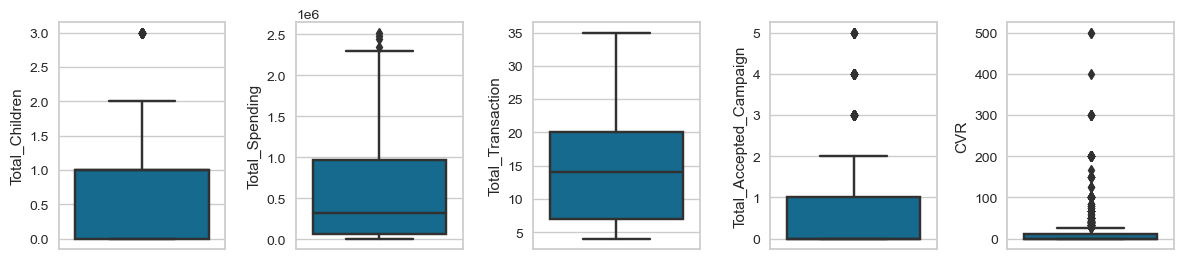

In [72]:
#Cek Outlier Fitur Engineering
plt.figure(figsize=(12, 15))
for i in range(0, len(num_fe)):
    plt.subplot(6, 5, i+1)
    sns.boxplot(y=df[num_fe[i]], orient='v')
    plt.tight_layout()

In [74]:
# Filter Outlier
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries2 = np.array([True] * len(df))
for col in num_fe:
    zscore = np.abs(stats.zscore(df[col]))  # Menghitung absolute Z-score
    filtered_entries = (zscore < 3) & filtered_entries2

df = df[filtered_entries2]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 2065
Jumlah baris setelah memfilter outlier: 2065


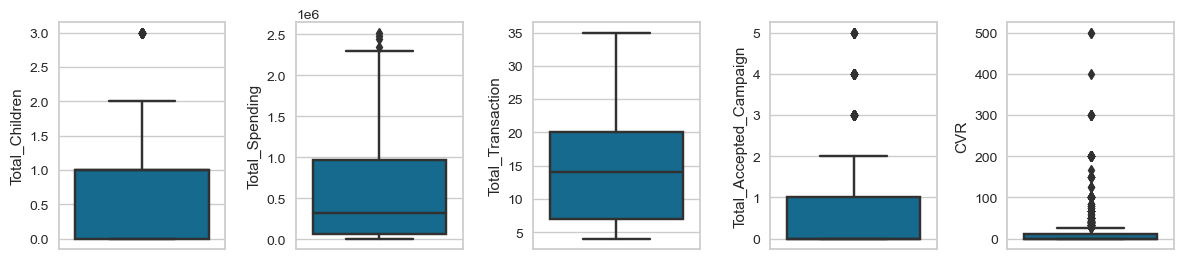

In [63]:
#Cek Outlier Fitur Engineering
plt.figure(figsize=(12, 15))
for i in range(0, len(num_fe)):
    plt.subplot(6, 5, i+1)
    sns.boxplot(y=df[num_fe[i]], orient='v')
    plt.tight_layout()

- fitur Education menggunakan Label Encoding
- fitur Marital_Status dan Cat_Age menggunakan One Hot Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [29]:
#Label Encoding untuk Education
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}
df['Education'] = df['Education'].map(mapping_education)

In [30]:
# 2. One Hot Encoding untuk Marital_Status dan Cat_Age menggunakan pd.get_dummies
marital_status_dummies = pd.get_dummies(df['Marital_Status'], prefix='Status')
cat_age_dummies = pd.get_dummies(df['Cat_Age'], prefix='Age')

# Menggabungkan hasil encoding dengan dataframe asli
df = df.drop(columns=['Marital_Status', 'Cat_Age'])
df = pd.concat([df, marital_status_dummies, cat_age_dummies], axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2065 entries, 0 to 2239
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               2065 non-null   int64         
 1   ID                       2065 non-null   int64         
 2   Year_Birth               2065 non-null   int64         
 3   Education                2065 non-null   category      
 4   Income                   2065 non-null   float64       
 5   Kidhome                  2065 non-null   int64         
 6   Teenhome                 2065 non-null   int64         
 7   Dt_Customer              2065 non-null   datetime64[ns]
 8   Recency                  2065 non-null   int64         
 9   MntCoke                  2065 non-null   int64         
 10  MntFruits                2065 non-null   int64         
 11  MntMeatProducts          2065 non-null   int64         
 12  MntFishProducts          2065 non-null 

In [32]:
df['Education'].value_counts()

Education
2    1028
4     456
3     348
1     179
0      54
Name: count, dtype: int64

In [33]:
df['Education'] = df['Education'].astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2065 entries, 0 to 2239
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               2065 non-null   int64         
 1   ID                       2065 non-null   int64         
 2   Year_Birth               2065 non-null   int64         
 3   Education                2065 non-null   int32         
 4   Income                   2065 non-null   float64       
 5   Kidhome                  2065 non-null   int64         
 6   Teenhome                 2065 non-null   int64         
 7   Dt_Customer              2065 non-null   datetime64[ns]
 8   Recency                  2065 non-null   int64         
 9   MntCoke                  2065 non-null   int64         
 10  MntFruits                2065 non-null   int64         
 11  MntMeatProducts          2065 non-null   int64         
 12  MntFishProducts          2065 non-null 

In [34]:
df.head(5)

,Unnamed: 0,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Total_Accepted_Campaign,CVR,Status_Lajang,Status_Bertunangan,Status_Menikah,Status_Janda,Status_Duda,Age_Remaja,Age_Dewasa,Age_Lansia
0,0,5524,1957,2,58138000.0,0,0,2012-09-04,58,635000,...,1,3.571429,True,False,False,False,False,False,False,True
1,1,2174,1954,2,46344000.0,1,1,2014-03-08,38,11000,...,0,1.200000,True,False,False,False,False,False,False,True
2,2,4141,1965,2,71613000.0,0,0,2013-08-21,26,426000,...,0,5.250000,False,True,False,False,False,False,False,True
3,3,6182,1984,2,26646000.0,1,0,2014-02-10,26,11000,...,0,1.333333,False,True,False,False,False,False,True,False
4,4,5324,1981,4,58293000.0,1,0,2014-01-19,94,173000,...,0,3.800000,False,False,True,False,False,False,True,False


In [35]:
df_scale = df.copy()

In [36]:
X = df_scale.drop(columns=['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Status_Lajang', 'Status_Bertunangan','Status_Menikah', 'Status_Janda', 'Status_Duda',  'Age_Remaja', 'Age_Dewasa', 'Age_Lansia', 'Dt_Customer', 'Response', 'Complain'])

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2065 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2065 non-null   float64
 1   Kidhome                  2065 non-null   int64  
 2   Teenhome                 2065 non-null   int64  
 3   Recency                  2065 non-null   int64  
 4   MntCoke                  2065 non-null   int64  
 5   MntFruits                2065 non-null   int64  
 6   MntMeatProducts          2065 non-null   int64  
 7   MntFishProducts          2065 non-null   int64  
 8   MntSweetProducts         2065 non-null   int64  
 9   MntGoldProds             2065 non-null   int64  
 10  NumDealsPurchases        2065 non-null   int64  
 11  NumWebPurchases          2065 non-null   int64  
 12  NumCatalogPurchases      2065 non-null   int64  
 13  NumStorePurchases        2065 non-null   int64  
 14  NumWebVisitsMonth        2065

In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [39]:
X.head(10)

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Z_CostContact,Z_Revenue,umur,Membership_Duration,Total_Children,Total_Transaction,Total_Spending,Total_Accepted_Campaign,CVR
0,0.395694,-0.856969,-0.950029,0.302926,1.039735,1.741458,2.118512,2.761011,2.030025,1.100369,...,-0.115101,0.0,0.0,1.019328,1.528984,-1.330859,1.427698,1.878396,0.69418,-0.104676
1,-0.199355,0.986407,0.890318,-0.389007,-0.831142,-0.613098,-0.726308,-0.628530,-0.651406,-0.743452,...,-0.115101,0.0,0.0,1.275774,-1.406722,1.382096,-1.121368,-0.921911,-0.48467,-0.629884
2,1.075555,-0.856969,-0.950029,-0.804168,0.413111,0.685968,-0.088858,1.544764,-0.034985,0.066030,...,-0.115101,0.0,0.0,0.335471,0.061131,-1.330859,0.891053,0.397228,-0.48467,0.267083
3,-1.193188,0.986407,-0.950029,-0.804168,-0.831142,-0.531907,-0.652553,-0.469022,-0.589764,-0.765937,...,-0.115101,0.0,0.0,-1.288690,-1.406722,0.025619,-0.853046,-0.876120,-0.48467,-0.600355
4,0.403514,0.986407,-0.950029,1.548407,-0.345433,0.523584,-0.136271,0.248763,0.149941,-0.541081,...,-0.115101,0.0,0.0,-1.032243,-1.406722,0.025619,0.622730,-0.226237,-0.48467,-0.054054
5,0.616428,-0.856969,0.890318,-1.150134,0.694942,0.496520,-0.241635,-0.668407,0.612257,-0.563567,...,-0.115101,0.0,0.0,0.164507,0.061131,0.025619,1.025214,0.291556,-0.48467,-0.083584
6,0.269408,-0.856969,0.890318,-0.527394,-0.159545,1.118989,0.106065,0.328517,0.828004,-0.271254,...,-0.115101,0.0,0.0,-0.177422,1.528984,0.025619,0.891053,0.069645,-0.48467,-0.120496
7,-0.849701,0.986407,-0.950029,-0.596587,-0.636259,-0.369523,-0.462899,-0.608592,-0.651406,-0.361196,...,-0.115101,0.0,0.0,-1.374172,0.061131,0.025619,-0.584723,-0.671820,-0.48467,-0.618811
8,-1.006258,0.986407,-0.950029,-1.046344,-0.822147,-0.640162,-0.631481,-0.608592,-0.589764,-0.833394,...,-0.115101,0.0,0.0,-0.433868,0.061131,0.025619,-1.121368,-0.888448,0.69418,-0.748003
9,0.054804,0.986407,-0.950029,-1.323118,-0.849131,-0.504843,-0.726308,-0.668407,-0.620585,-0.855880,...,-0.115101,0.0,0.0,-1.203208,0.061131,0.025619,-1.389691,-0.936000,-0.48467,-0.769096


# MODELING

In [40]:
df_model = X.copy()

##### PCA

In [41]:
from sklearn.decomposition import PCA 

# fit pca
pca = PCA(n_components = 2)
pca.fit(df_model)

# pca transformed 
data_pca = pca.transform(df_model)

In [42]:
data_pca1 = pd.DataFrame(data_pca)

##### Mencari Cluster Terbaik 

In [43]:
# mencari nilai k optimal dengan parameter inertia
from sklearn.cluster import KMeans

inertia = []
k_values = range(1,11)

# fit model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(data_pca1)
    inertia.append(kmeans.inertia_)

In [45]:
pip install yellowbrick

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/282.6 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/282.6 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/282.6 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/282.6 kB 217.9 kB/s eta 0:00:02
   ----- ---------------------------------- 41.0/282.6 kB 98.1 kB/s eta 0:00:03
   ----- ---------------------------------- 41.0/282.6 kB 98.1 kB/s eta 0:00:03
   ----- ------------

Text(0, 0.5, 'Inertia')

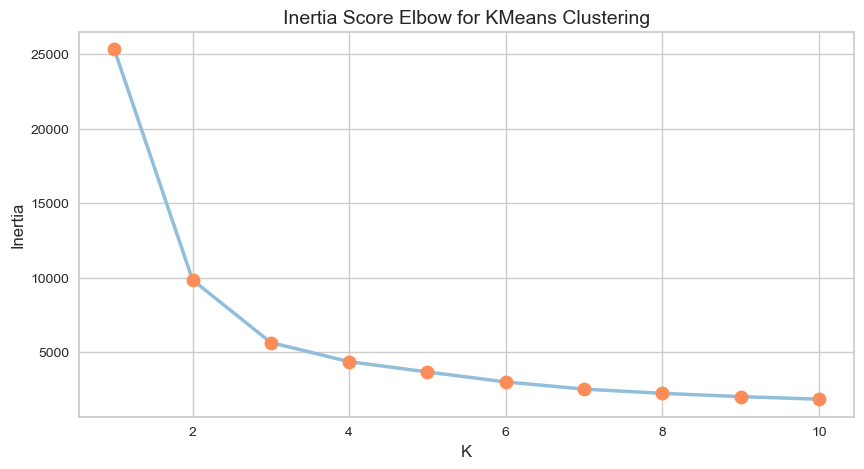

In [44]:
# Visualisasi grafik elbow method
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10, 5))

# plot grafik
plt.plot(k_values, inertia ,color='#91bfdb', linewidth= 2.5, marker='o', markerfacecolor='#fc8d59', markersize=10)
plt.title('Inertia Score Elbow for KMeans Clustering', fontsize=14)
plt.xlabel('K',fontsize=12)
plt.ylabel('Inertia',fontsize=12)

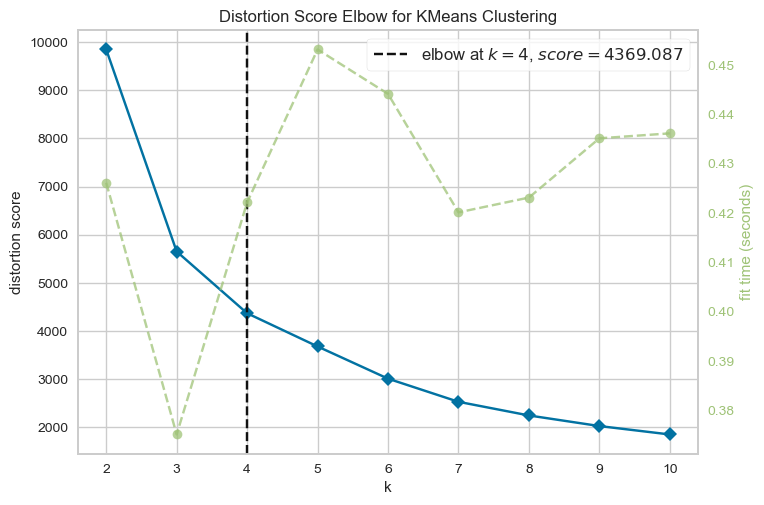

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
# visualisasi dengan parameter distortion
from yellowbrick.cluster import KElbowVisualizer

# fit model
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(data_pca1)       
visualizer.show() 

- Berdasarkan Distortion Score dan Elbow methode didapatkan jumlah cluster terbaik adalah 4 Cluster

##### Clustering Menggunakan K-Means

In [46]:
from sklearn.cluster import KMeans

# fit model
kmeans = KMeans(n_clusters=4, random_state = 123)
kmeans.fit(data_pca1.values)
data_pca1['cluster'] = kmeans.labels_

In [47]:
data_pca1.sample(10)

,0,1,cluster
239,1.378297,3.498658,2
1391,-0.730861,1.829619,3
624,2.954493,1.117403,2
1004,6.131058,-1.622080,0
893,-1.786728,0.936719,3
75,-0.071286,-1.665348,1
72,-2.465340,0.179060,1
1115,0.638406,2.331786,3
1949,2.287108,0.334795,2
1476,-2.445951,-2.289048,1


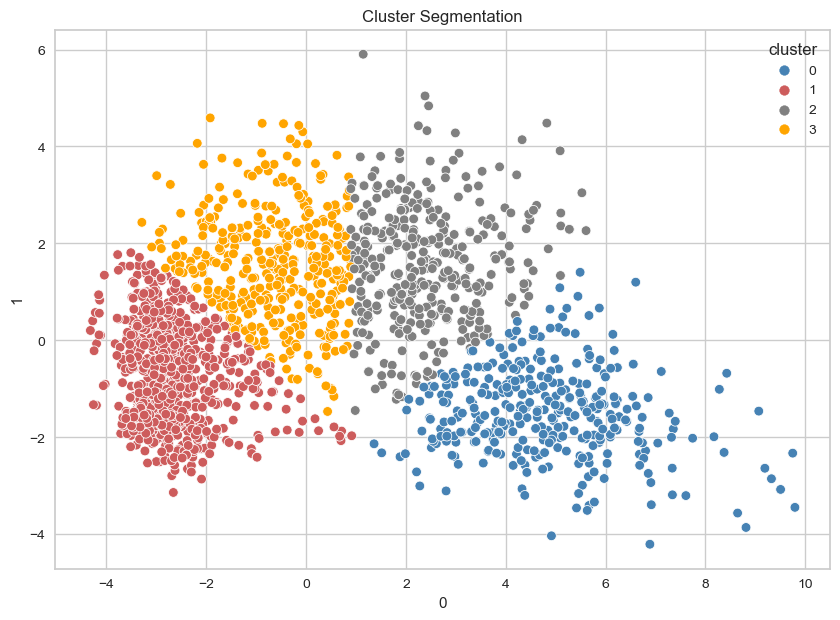

In [48]:
# Mendefinisikan palet warna
color =  ['steelblue', 'indianred', 'grey', 'orange', 'olive']

# Membuat visualisasi hasil segmentasi klaster
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(data=data_pca1, x=0, y=1, hue='cluster', palette=color, ax=ax)
plt.title('Cluster Segmentation')
plt.show()

#### Evaluation

In [49]:
data_pca1.columns = data_pca1.columns.astype(str)

In [50]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=123)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='coolwarm')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

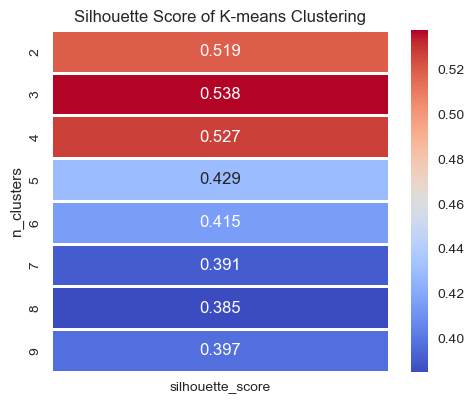

In [51]:
visualize_silhouette_layer(data_pca1)

## Customer Personality Analysis for Marketing Retargeting

In [52]:
df['Cluster'] = kmeans.labels_

In [53]:
feats = ['Recency','Total_Transaction','Total_Spending', 'Income','Cluster','CVR', 'umur']
data_summary = df[feats]

In [97]:
round(data_summary.groupby('Cluster').agg(['median']),2).round()

,Recency,Total_Transaction,Total_Spending,Income,CVR,umur
,median,median,median,median,median,median
Cluster,,,,,,
0,54.0,20.0,1365000.0,76800000.0,9.0,55.0
1,49.0,7.0,57000.0,33378000.0,1.0,51.0
2,50.0,23.0,964000.0,64355000.0,5.0,59.0
3,50.0,16.0,399000.0,50412500.0,3.0,58.0


1. Cluster 0 ( High Spender )
- Lama Belanja kembali sekitar 54 hari
- Total Transaksi yang dilakukan sebanyak 20 transaksi
- Total Spending yang paling besar sebesar 1365000
- Income yang didapat paling besar sebesar 76800000
- Konversi paling besar sebanyak 9 %
- Umur sekitar 55 Tahun

2. Cluster 1 ( Risk Of Turn )
- Lama belanja kembali sekitar 49 hari
- Total Transaksi paling kecil hanya 7 transaksi
- Total Spending dan Income paling kecil
- CVR yang dihasilkan paling kecil hanya 1%
- Umur sekitar 51 Tahun

3. Cluster 2 ( Mid Spender )
- Lama belanja kembali sekitar 50 Hari
- Total Transaksi sebanyak 23 transaksi, paling besar
- Total Spending dan Income paling besar Kedua
- CVR yang didapat sebesar 5 % Terbesar kedua
- Umur Sekitar 59 Tahun

4. Cluster 3 ( Low Spender )
- Lama belanja kembali sekitar 50 hari
- Total Transaksi diatas Cluster 1, paling rendah kedua
- Total Spending dan Income paling rendah, namun masih diatas Cluster 1
- CVR yang didapat 3%
- Umur sekitar 58 Tahun

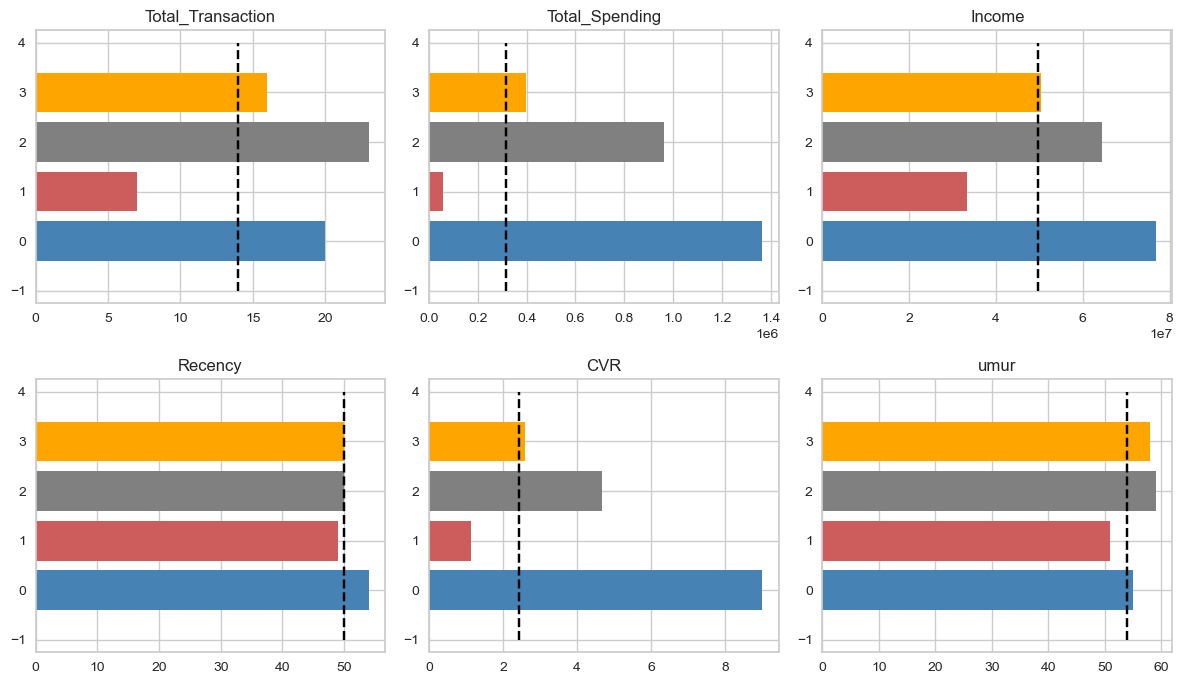

In [55]:
def dist_list(lst):
    plt.figure(figsize=[12, 7])
    i = 1
    for col in lst:
        ax = plt.subplot(2, 3, i)
        ax.vlines(df[col].median(), ymin=-1, ymax=4, color='black', linestyle='--')
        g = df.groupby('Cluster')
        x = g[col].median().index
        y = g[col].median().values
        ax.barh(x, y, color=color) 
        plt.title(col)
        i = i + 1

dist_list(['Total_Transaction','Total_Spending', 'Income', 'Recency', 'CVR', 'umur'])
plt.tight_layout()
plt.show()

In [56]:
# persentase total customer setiap cluster
cluster_count = data_summary['Cluster'].value_counts().reset_index()
cluster_count.columns = ['Cluster', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(data_summary))*100,2)
cluster_count = cluster_count.sort_values(by=['Cluster']).reset_index(drop=True)
cluster_count

,Cluster,count,percentage (%)
0,0,373,18.06
1,1,905,43.83
2,2,379,18.35
3,3,408,19.76


([<matplotlib.axis.XTick at 0x1b0d52a7910>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

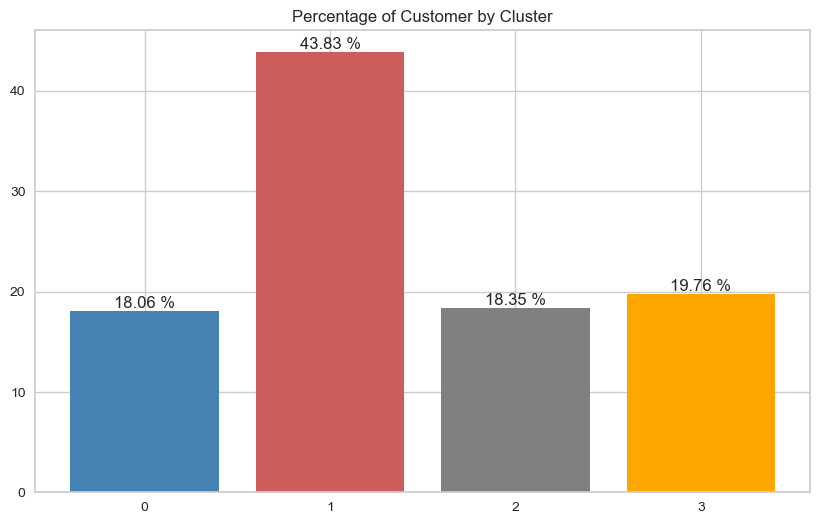

In [57]:
#visualisasi persentase customer pada setiap cluster
fig, ax = plt.subplots(figsize=(10,6))

bars = plt.bar(x=cluster_count['Cluster'], height= cluster_count['percentage (%)'], color=color)

for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height, s=f'{height} %', ha='center',va='bottom')

plt.title('Percentage of Customer by Cluster')
plt.xticks(range(0,4))

In [100]:
variable = [ 'NumWebVisitsMonth', 'Total_Accepted_Campaign', 'Membership_Duration', 'NumDealsPurchases','NumStorePurchases']

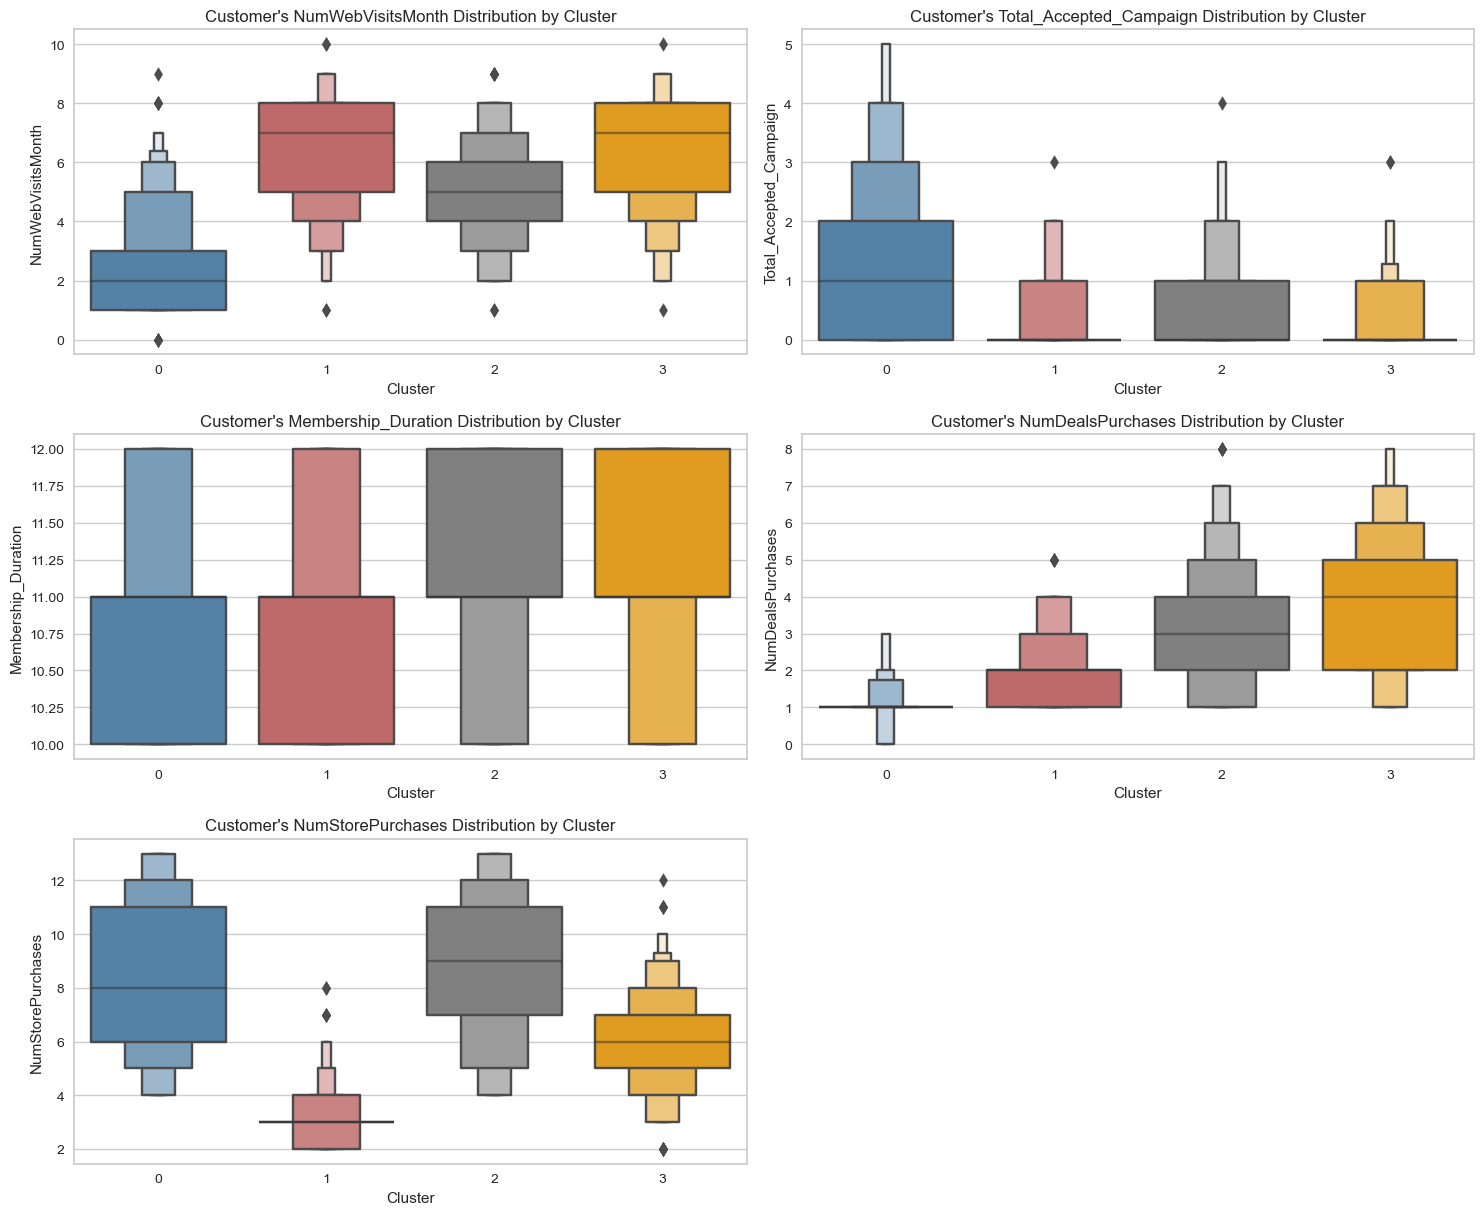

In [101]:
# distribusi cluster
plt.figure(figsize=(15, 20))
for i in range(0, len(variable)):
    plt.subplot(5, 2, i+1)
    sns.boxenplot(x='Cluster', y=df[variable[i]], data=df, palette=color).set(title=f'Customer\'s {variable[i]} Distribution by Cluster')
    plt.tight_layout()